In [4]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Reshape, Input
import numpy as np


In [5]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype(np.float64)[:150] / 255.


In [25]:
compression_level = 32

In [36]:
input_im = Input(shape=(28,28,1))
layer0 = Reshape((28**2,))(input_im)
layer1 = Dense(4*28**2, activation='softmax')(layer0)
layer2 = Dense(compression_level, activation='relu')(layer1)

encoder = Model(input_im, layer2)

input_de = Input(shape=(compression_level,))
layer3 = Dense(4*28**2, activation='softmax', input_shape=(compression_level,))(input_de)
layer4 = Dense(28**2, activation='sigmoid')(layer3)
outlayer = Reshape((28,28,1))(layer4)

decoder = Model(input_de, outlayer)

In [37]:
autoencoder = Model(inputs=input_im, outputs=decoder(encoder(input_im)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:

autoencoder.fit(X_train, X_train, 150, 200, shuffle=True)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.6931
Epoch 2/200
1/1 [==============================] - 0s 82ms/step - loss: 0.6928
Epoch 3/200
1/1 [==============================] - 0s 83ms/step - loss: 0.6924
Epoch 4/200
1/1 [==============================] - 0s 84ms/step - loss: 0.6919
Epoch 5/200
1/1 [==============================] - 0s 82ms/step - loss: 0.6915
Epoch 6/200
1/1 [==============================] - 0s 87ms/step - loss: 0.6911
Epoch 7/200
1/1 [==============================] - 0s 106ms/step - loss: 0.6907
Epoch 8/200
1/1 [==============================] - 0s 143ms/step - loss: 0.6903
Epoch 9/200
1/1 [==============================] - 0s 120ms/step - loss: 0.6899
Epoch 10/200
1/1 [==============================] - 0s 96ms/step - loss: 0.6894
Epoch 11/200
1/1 [==============================] - 0s 241ms/step - loss: 0.6890
Epoch 12/200
1/1 [==============================] - 0s 184ms/step - loss: 0.6886
Epoch 13/200
1/1 [============================

In [39]:
import matplotlib.pyplot as plt

In [40]:
a = X_test[:100]

a = autoencoder.predict(a)

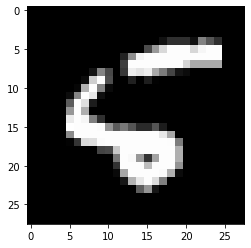

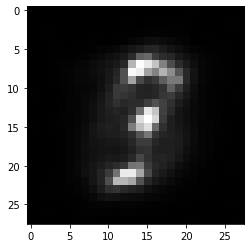

In [44]:
n=8

plt.imshow(X_test[n], cmap='gray')
plt.show()
plt.imshow(a[n], cmap='gray')
plt.show()

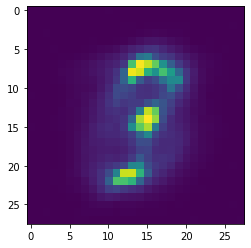

array([[0.        , 0.1250233 , 0.13273193, 0.16599128, 0.11332142,
        0.03674399, 0.        , 0.        , 0.17530358, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08191869, 0.14579438, 0.        , 0.        , 0.11526936,
        0.        , 0.        , 0.07678285, 0.        , 0.        ,
        0.14425054, 0.08309201, 0.1325766 , 0.        , 0.        ,
        0.        , 0.        ]], dtype=float32)

In [45]:
b = encoder.predict(a[:1])
b > 0
plt.imshow(decoder.predict(b>0)[0])
plt.show()
b